## Breakdown of the project:

1. **Loading the dataset:** Using pandas load the data file(.csv)
2. **Data Visualization:** Creating plots to find relations between the features.
3. **Insights and Inferences from results:** Using heat maps and plots to infer the relationships between priority of the call and time and date of the call.

This project can also be used to find more relations than the one done in this notebook.There could be a relationship between an area and a description.Feel free to use the code. Cheere!!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['911_calls_for_service.csv']


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('../input/911_calls_for_service.csv')
df.head()

,Unnamed: 0,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,0,2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,1,2015-07-13 10:47:00,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,2,2015-07-13 10:42:00,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,3,2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,4,2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"


What is the most common priority type for a 911 call based off of this new column?

In [4]:
df['priority'].value_counts()

Medium            1399431
Low                636380
High               434022
Non-Emergency      321619
Emergency            1004
Out of Service        803
Name: priority, dtype: int64

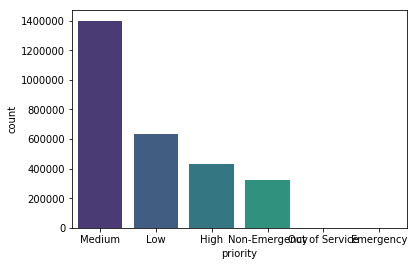

In [5]:
import seaborn as sns
sns.countplot(x='priority',data=df,palette='viridis')

Now let us begin to focus on time information

In [6]:
df['callDateTime'].iloc[0]

'2015-07-13 10:41:00'

In [7]:
df['callDateTime']=pd.to_datetime(df['callDateTime'])

In [8]:
time=df['callDateTime'].iloc[0]
df['Hour']=df['callDateTime'].apply(lambda time:time.hour)
df['Month']=df['callDateTime'].apply(lambda time:time.month)
df['Day of Week']=df['callDateTime'].apply(lambda time:time.dayofweek)

In [9]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

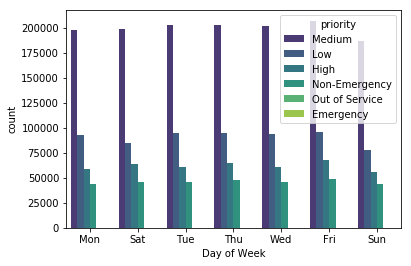

In [10]:
sns.countplot(x='Day of Week',data=df,hue='priority',palette='viridis')

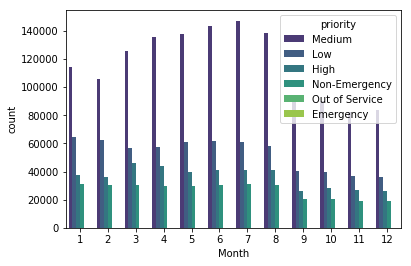

In [11]:
sns.countplot(x='Month',data=df,hue='priority',palette='viridis')

In [12]:
byMonth=df.groupby('Month').count()
byMonth.head()

,Unnamed: 0,callDateTime,priority,district,description,callNumber,incidentLocation,location,Hour,Day of Week
Month,,,,,,,,,,
1,248121,248121,248121,248121,248121,248121,248121,248121,248121,248121
2,234872,234872,234872,234872,234872,234872,234872,234872,234872,234872
3,258980,258980,258980,258980,258980,258980,258980,258980,258980,258980
4,268783,268783,266544,268783,268783,268783,268783,268783,268783,268783
5,273061,273061,268645,273061,273061,273061,273061,273061,273061,273061


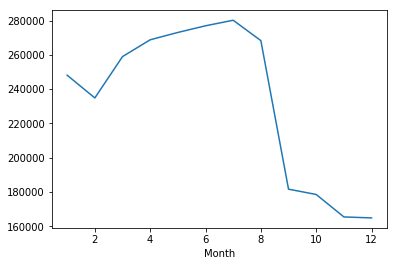

In [13]:
byMonth['incidentLocation'].plot()

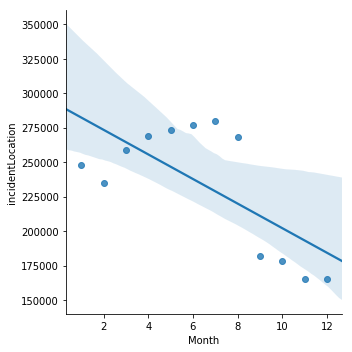

In [14]:
sns.lmplot(x='Month',y='incidentLocation',data=byMonth.reset_index())

In [15]:
df['Date']=df['callDateTime'].apply(lambda p:p.date())

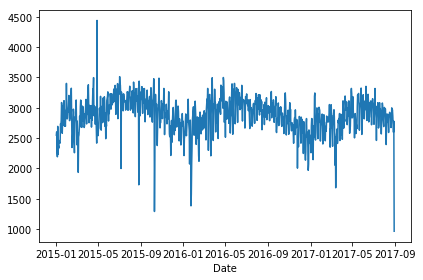

In [16]:
df.groupby('Date').count()['incidentLocation'].plot()
plt.tight_layout()

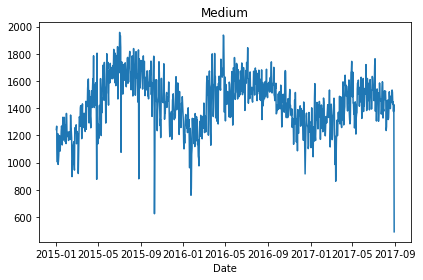

In [17]:
df[df['priority']=='Medium'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Medium')
plt.tight_layout()

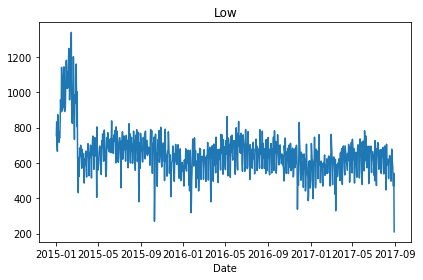

In [18]:
df[df['priority']=='Low'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Low')
plt.tight_layout()

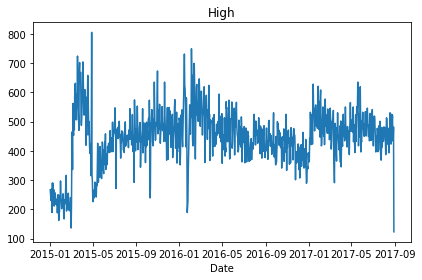

In [19]:
df[df['priority']=='High'].groupby('Date').count()['incidentLocation'].plot()
plt.title('High')
plt.tight_layout()

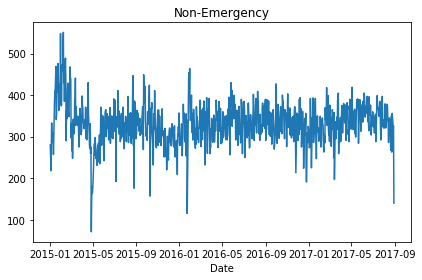

In [20]:
df[df['priority']=='Non-Emergency'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Non-Emergency')
plt.tight_layout()

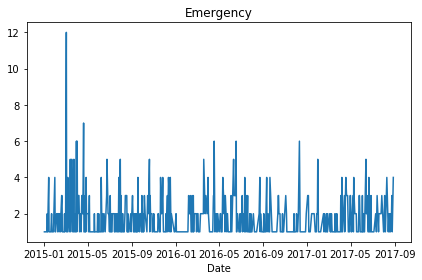

In [21]:
df[df['priority']=='Emergency'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Emergency')
plt.tight_layout()

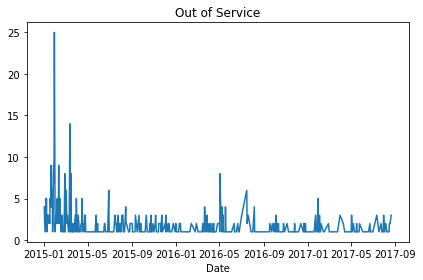

In [22]:
df[df['priority']=='Out of Service'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Out of Service')
plt.tight_layout()

In [23]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['priority'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,14122,10712,8941,6909,5644,5432,6981,11407,16206,17395,18596,20384,20955,21545,23735,23807,24309,25194,25284,23698,23062,23145,21942,20705
Mon,12307,9598,7703,5743,4791,4785,6321,10360,15051,16770,18456,19562,20452,20740,22643,23599,25012,25784,24338,22880,22050,20626,18054,15625
Sat,17865,15041,13426,9490,7383,6204,6161,7992,11735,14811,16628,18536,19262,19424,21132,20444,20260,21318,21497,21029,21567,22150,21279,19787
Sun,17448,15216,12949,9377,6777,5224,5082,6622,9501,12180,14718,16473,17317,18358,20141,19718,20763,21728,21446,20772,20253,19670,17745,15702
Thu,13059,10008,8164,6176,5213,5288,7097,11122,16010,17653,18815,20890,21342,21598,23755,24193,25212,26644,25123,23018,22467,21705,19306,17401


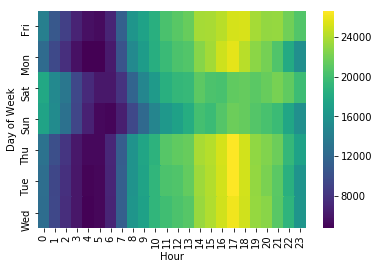

In [24]:
sns.heatmap(dayHour,cmap='viridis')

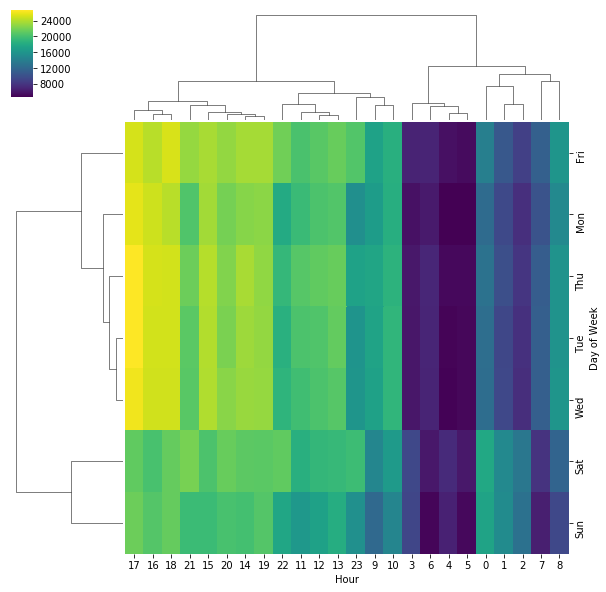

In [25]:
sns.clustermap(dayHour,cmap='viridis')

In [26]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['priority'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,40598,35601,37879,40540,39642,41585,43445,36679,28590,28004,23451,24096
Mon,33555,34581,35980,35157,39737,40041,37705,41669,23527,25476,24255,21567
Sat,36406,33032,32685,41902,36651,36573,41634,38934,24576,26908,22113,23007
Sun,33508,30067,31870,35350,36386,34377,39225,35872,22635,23165,23410,19315
Thu,36977,35121,40812,38371,35591,43501,40635,36635,27367,27352,21197,27700


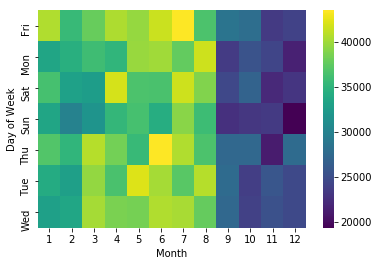

In [27]:
sns.heatmap(dayMonth,cmap='viridis')

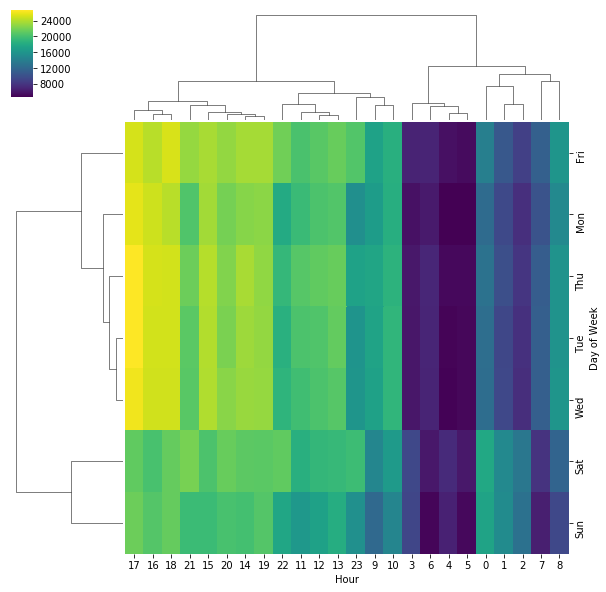

In [28]:
sns.clustermap(dayHour,cmap='viridis')

Feel free to contact me and ask questions. If this helped you in any way upvote :)